# Boston Housing Dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import mlflow
import mlflow.sklearn

In [2]:
RANDOM_SEED = 42

In [32]:
df = pd.read_csv('./data/boston.csv')
df['mv'] = np.log(df['mv'])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['mv']), df['mv'], test_size=0.2, random_state=RANDOM_SEED)

In [34]:
df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,3.178054
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,3.072693
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,3.546740
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,3.508556
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,3.589059


In [35]:
X_train.shape

(404, 13)

In [36]:
X_train.isnull().sum()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
dtype: int64

C:\Users\dusti\AppData\Local\Temp\ipykernel_8968\942285416.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

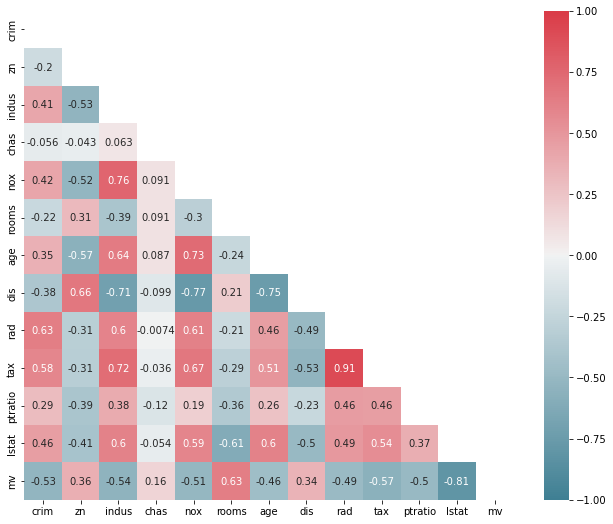

In [37]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, cmap=cmap, annot=True)

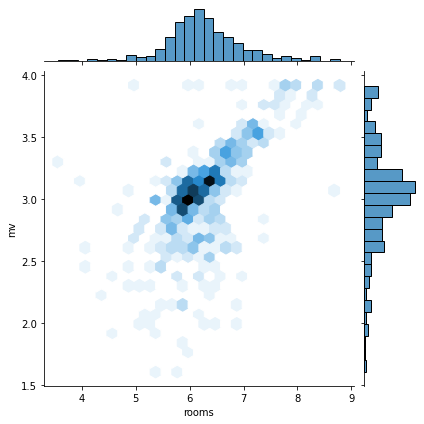

In [38]:
sns.jointplot(x='rooms', y='mv', data=df, kind='hex')

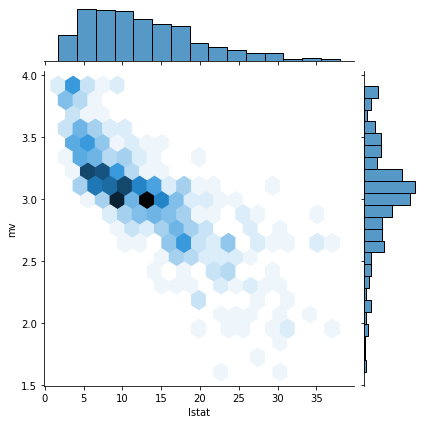

In [39]:
sns.jointplot(x='lstat', y='mv', data=df, kind='hex')

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'lstat'}>],
       [<AxesSubplot:title={'center':'mv'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

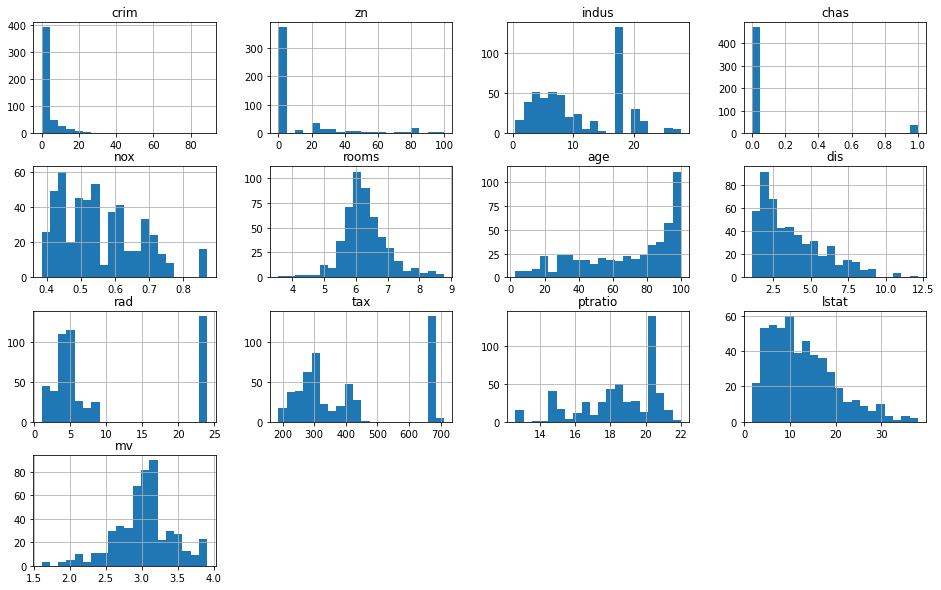

In [40]:
df.hist(figsize=(16,10), bins=20)

In [41]:
def rmse(y_actual, y_pred):
    return np.sqrt(mean_squared_error(y_actual, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [42]:
mlflow.sklearn.autolog()

2022/05/07 11:48:11 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


In [43]:
numeric_columns = X_train.select_dtypes(include=['float', 'int']).columns.values.tolist()

In [44]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.values.tolist()

In [45]:
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# categorical_transformer = Pipeline(
#     steps=[('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))]
# )

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns)
        # , ('cat', categorical_transformer, categorical_columns)
    ]
)

clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)


clf.fit(X_train, y_train)

2022/05/07 11:48:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5cb4aa415ef84a929314c91de548b5b1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/05/07 11:48:13 WARNING mlflow.utils: Truncated the value of the key `steps`. Truncated value: `[('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms',
                           ...`
2022/05/07 11:48:13 WARNING mlflow.utils: Truncated the value of the key `preprocessor`. Truncated value: `ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['crim', 'zn', 'indus', 'chas', 'nox', 'rooms',
                                  'age', 'dis...`
2022/05/07 11:48:13 WARNING 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['crim', 'zn', 'indus',
                                                   'chas', 'nox', 'rooms',
                                                   'age', 'dis', 'rad', 'tax',
                                                   'ptratio', 'lstat'])])),
                ('regressor', LinearRegression())])

In [46]:
y_pred = clf.predict(X_test)
print(rmse(y_test, y_pred))
print(r2_score(y_test, y_pred))

model_results = pd.DataFrame({'Model':'LinearRegression', 
        'Best Param':None, 
        'RMSE': rmse(y_test, y_pred), 
        'R2': r2_score(y_test, y_pred)}
    , index=[0])

0.18862475782537239
0.7732221181391206


## Ridge Regression

In [47]:
ridge_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('ridge', Ridge(fit_intercept=True, random_state=42))
    ]
)

ridge_grid_params = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge_clf = GridSearchCV(ridge_pipeline, param_grid=ridge_grid_params, scoring=rmse_scorer, cv=3)

ridge_clf.fit(X_train, y_train)

2022/05/07 11:48:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8a8ee52275574a1bb5f0657728e1fb71', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/05/07 11:48:16 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScale...`
2022/05/07 11:48:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\dusti\anaconda3\envs\practical_machine_learning\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at infer

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['crim',
                                                                          'zn',
                                                                          'indus',
                                                                          'chas',
                                                                          'nox',
                                                                          'rooms',
                                                                          'age',
                                                              

In [48]:
ridge_pred = ridge_clf.predict(X_test)

In [49]:
print(ridge_clf.best_params_)
print(rmse(y_test, ridge_pred))
print(r2_score(y_test, ridge_pred))

model_results = model_results.append({'Model':'Ridge', 
        'Best Param':ridge_clf.best_params_, 
        'RMSE': rmse(y_test, ridge_pred), 
        'R2': r2_score(y_test, ridge_pred)}
    , ignore_index=True)

{'ridge__alpha': 1}
0.1889743449217169
0.772380743045625


## Lasso

In [50]:
lasso_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lasso', Lasso(fit_intercept=True, random_state=42))
    ]
)

lasso_grid_params = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso_clf = GridSearchCV(lasso_pipeline, param_grid=lasso_grid_params, scoring=rmse_scorer, cv=3)

lasso_clf.fit(X_train, y_train)

2022/05/07 11:48:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '29b37c8da32a4b8ba51bb055fc0a1807', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/05/07 11:48:21 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScale...`
2022/05/07 11:48:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\dusti\anaconda3\envs\practical_machine_learning\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at infer

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['crim',
                                                                          'zn',
                                                                          'indus',
                                                                          'chas',
                                                                          'nox',
                                                                          'rooms',
                                                                          'age',
                                                              

In [51]:
lasso_pred = lasso_clf.predict(X_test)

In [52]:
print(lasso_clf.best_params_)
print(rmse(y_test, lasso_pred))
print(r2_score(y_test, lasso_pred))

model_results = model_results.append({'Model':'Lasso', 
        'Best Param':lasso_clf.best_params_, 
        'RMSE': rmse(y_test, lasso_pred), 
        'R2': r2_score(y_test, lasso_pred)}
    , ignore_index=True)

{'lasso__alpha': 0.001}
0.19032446013402451
0.7691167020152321


## ElasticNet

In [53]:
elastic_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('elastic', ElasticNet(fit_intercept=True, random_state=42, max_iter=10000))
    ]
)

elastic_grid_params = {
    'elastic__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elastic__l1_ratio': [0.25, 0.5, 0.75]
}

elastic_clf = GridSearchCV(elastic_pipeline, param_grid=elastic_grid_params, scoring=rmse_scorer, cv=3)

elastic_clf.fit(X_train, y_train)

2022/05/07 11:48:26 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2d865ed35e6f4db990bbf48edb26e9d0', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2022/05/07 11:48:26 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScale...`
2022/05/07 11:48:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "C:\Users\dusti\anaconda3\envs\practical_machine_learning\lib\site-packages\mlflow\models\signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at infer

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['crim',
                                                                          'zn',
                                                                          'indus',
                                                                          'chas',
                                                                          'nox',
                                                                          'rooms',
                                                                          'age',
                                                              

In [54]:
elastic_pred = elastic_clf.predict(X_test)

In [55]:
print(elastic_clf.best_params_)
print(rmse(y_test, elastic_pred))
print(r2_score(y_test, elastic_pred))

model_results = model_results.append({'Model':'ElasticNet', 
        'Best Param':elastic_clf.best_params_, 
        'RMSE': rmse(y_test, elastic_pred), 
        'R2': r2_score(y_test, elastic_pred)}
    , ignore_index=True)

{'elastic__alpha': 0.001, 'elastic__l1_ratio': 0.25}
0.18908098568314885
0.7721237733514928


In [56]:
model_results

,Model,Best Param,RMSE,R2
0,LinearRegression,None,0.188625,0.773222
1,Ridge,{'ridge__alpha': 1},0.188974,0.772381
2,Lasso,{'lasso__alpha': 0.001},0.190324,0.769117
3,ElasticNet,"{'elastic__alpha': 0.001, 'elastic__l1_ratio':...",0.189081,0.772124


<AxesSubplot:xlabel='RMSE', ylabel='R2'>

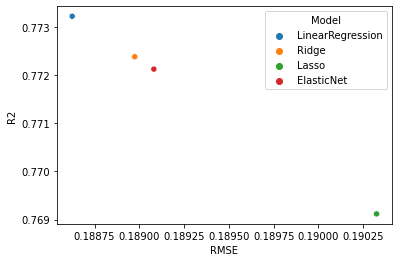

In [57]:
sns.scatterplot(x='RMSE', y='R2', data=model_results, hue='Model')

In [58]:
model_results

,Model,Best Param,RMSE,R2
0,LinearRegression,None,0.188625,0.773222
1,Ridge,{'ridge__alpha': 1},0.188974,0.772381
2,Lasso,{'lasso__alpha': 0.001},0.190324,0.769117
3,ElasticNet,"{'elastic__alpha': 0.001, 'elastic__l1_ratio':...",0.189081,0.772124
